#ЗАДАЧА 5

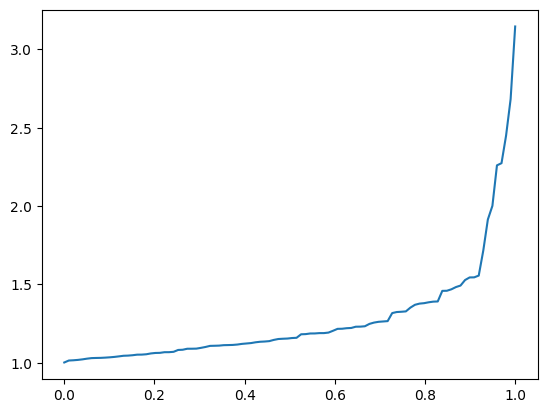

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def pareto(teta, x):
  return (1 - x) ** (1 / (-teta + 1))

n = 100
x_dim = np.linspace(0, 1, 100)
x = np.random.uniform(0, 1, 100)
teta = 5.532
y = np.array(pareto(teta, x))
x.sort()
y.sort()

plt.plot(x_dim, y)


##МЕДИАНА И θ:

In [ ]:
def teta_waved(x, n):
  return n / np.sum(np.log(x)) + 1

teta_wave = teta_waved(y, n)

left = round(-1.96 * np.log(2) * (2 ** (1/(teta_wave - 1))) / (teta_wave - 1) / np.sqrt(n) + 2 ** (1 / (teta_wave- 1)), 4)
right = round(1.96 * np.log(2) * (2 ** (1/(teta_wave - 1))) / (teta_wave - 1) / np.sqrt(n) + 2 ** (1 / (teta_wave - 1)), 4)

left_2 = round(-1.96 * (teta_wave - 1) / np.sqrt(n) + teta_wave, 4)
right_2 = round(1.96 * (teta_wave - 1) / np.sqrt(n) + teta_wave, 4)

med = (y[49] + y[50]) / 2

print("Ассимптотический доверительный интервал для медианы:", left, right, "\nМедиана:", round(med, 4))
print("Длина:", round(right - left, 4))
print()
print("Ассимптотический доверительный интервал для параметра θ:", left_2, right_2, "\nПараметр θ:", round(teta, 4))
print("Длина:", round(right_2 - left_2, 4))

Ассимптотический доверительный интервал для медианы: 1.1272 1.1952 
Медиана: 1.1558
Длина: 0.068

Ассимптотический доверительный интервал для параметра θ: 4.7295 6.5478 
Параметр θ: 5.532
Длина: 1.8183


##НЕПАРАМЕТРИЧЕСКИЙ БУТСТРАПОВСИЙ ИНТЕРВАЛ:

In [ ]:
def bootstrap_non_par(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]


bts_np = bootstrap_non_par(y)
delta = list()
median_wave = 2 ** (1/(teta_waved(y, n) - 1))
for i in range(1000):
  delta.append(np.median(bts_np[i]) - 2 ** (1/(teta_waved(y, n) - 1)))
delta.sort()
print("Непараметрический Бутстрап для доверительного интервала для медианы:", round(median_wave - delta[974], 4), round(median_wave - delta[24], 4))
print("Длина:", round(- round(median_wave - delta[974], 4) + round(median_wave - delta[24], 4), 4))
print()

delta_2 = list()
for i in range(1000):
  delta_2.append(teta_waved(bts_np[i], n) - teta_wave)
delta_2 = np.sort(delta_2)
print("Непараметрический Бутстрап для доверительного интервала для параметра θ:", round(teta_wave - delta_2[974], 4), round(teta_wave - delta_2[24], 4))
print("Длина:", round(- round(teta_wave - delta_2[974], 4) + round(teta_wave - delta_2[24], 4), 4))
print()

Непараметрический Бутстрап для доверительного интервала для медианы: 1.1125 1.1997
Длина: 0.0872

Непараметрический Бутстрап для доверительного интервала для параметра θ: 4.5874 6.4852
Длина: 1.8978



In [ ]:
def bootstrap_par(n_bootstrap_samples=50000):
  return [pareto(teta_wave, np.random.uniform(0, 1, 100)) for _ in range(n_bootstrap_samples)]

bts_par = bootstrap_par()
medians = list()
for i in range(50000):
  medians.append(2 ** (1/(teta_waved(bts_par[i], n) - 1)))
medians.sort()
print("Параметрический Бутстрап для доверительного интервала для медиан:", round(medians[1249], 4), round(medians[48749], 4))
print("Длина:", round(round(medians[48749], 4) - round(medians[1249], 4), 4))

tetas = list()
for i in range(50000):
  tetas.append(teta_waved(bts_par[i], n))
tetas.sort()
print("Параметрический Бутстрап для доверительного интервала для параметра θ:", round(tetas[1249], 4), round(tetas[48749], 4))
print("Длина:", round(round(tetas[48749], 4) - round(tetas[1249], 4), 4))



Параметрический Бутстрап для доверительного интервала для медиан: 1.1382 1.2115
Длина: 0.0733
Параметрический Бутстрап для доверительного интервала для параметра θ: 4.6122 6.3562
Длина: 1.744


##КРАСИВЫЙ РИСУНОЧЕК ДЛЯ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ МЕДИАН:

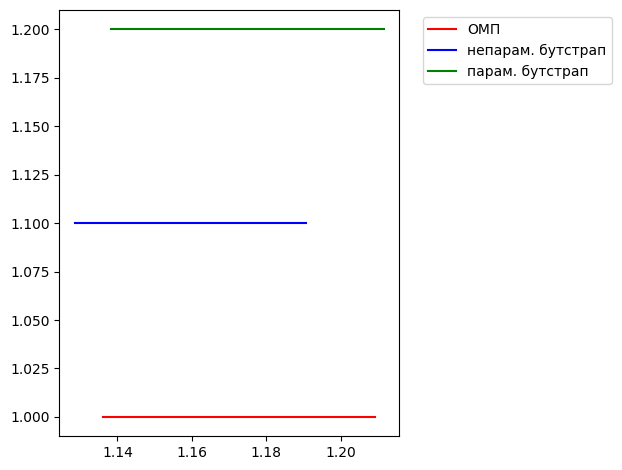

In [ ]:

x_med_assimpt_omp = np.array([left, right])
x_med_bootstrap_np = np.array([median_wave - delta[974], median_wave - delta[24]])
x_med_bootstrap_par = np.array([medians[1249], medians[48749]])
y_med_assimpt_omp = np.array([1, 1])
y_med_bootstrap_np = np.array([1.1, 1.1])
y_med_bootstrap_par = np.array([1.2, 1.2])

plt.plot(x_med_assimpt_omp, y_med_assimpt_omp, color = "red", label = "ОМП")
plt.plot(x_med_bootstrap_np, y_med_bootstrap_np, color = "blue", label = "непарам. бутстрап")
plt.plot(x_med_bootstrap_par, y_med_bootstrap_par, color = "green", label = "парам. бутстрап")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

##КРАСИВЫЙ РИСУНОЧЕК ДЛЯ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ ПАРАМЕТРА θ:

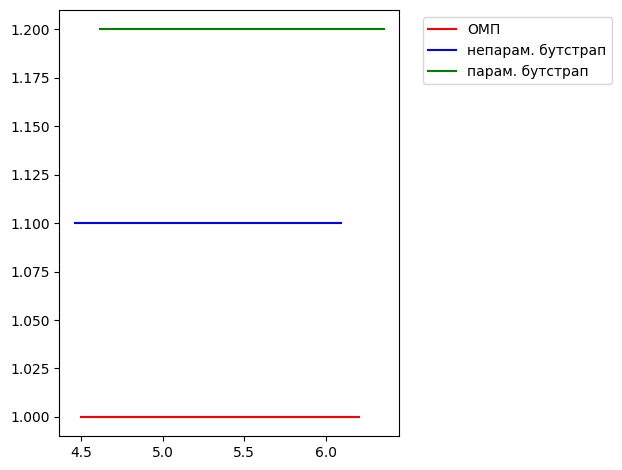

In [ ]:
x_teta_assimpt_omp = np.array([left_2, right_2])
x_teta_bootstrap_np = np.array([teta_wave - delta_2[974], teta_wave - delta_2[24]])
x_teta_bootstrap_par = np.array([tetas[1249], tetas[48749]])
y_teta_assimpt_omp = np.array([1, 1])
y_teta_bootstrap_np = np.array([1.1, 1.1])
y_teta_bootstrap_par = np.array([1.2, 1.2])

plt.plot(x_teta_assimpt_omp, y_teta_assimpt_omp, color = "red", label = "ОМП")
plt.plot(x_teta_bootstrap_np, y_teta_bootstrap_np, color = "blue", label = "непарам. бутстрап")
plt.plot(x_teta_bootstrap_par, y_teta_bootstrap_par, color = "green", label = "парам. бутстрап")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()